<a href="https://colab.research.google.com/github/ladyj-dev/Wine_All_You_Want/blob/main/wine_desciptions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install wordcloud

Import dependencies with the goal of creating a wine wordcloud based on descriptions and/or varieties of wine

In [ ]:
import pandas as pd


In [ ]:
import numpy as np


In [ ]:
import matplotlib.pyplot as plt
import seaborn as seaborn
import math

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_precision_recall_curve
from sklearn.linear_model import  LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from joblib import dump
from joblib import load

In [ ]:
csv_file = "https://winedata150k.s3.us-east-2.amazonaws.com/winemag-data_first150k.csv"

In [ ]:
word_cloud_df = pd.read_csv(csv_file)

In [ ]:
word_cloud_df.head(25)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
5,5,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73.0,Northern Spain,Toro,NaN,Tinta de Toro,Numanthia
6,6,Spain,Slightly gritty black-fruit aromas include a s...,San Román,95,65.0,Northern Spain,Toro,NaN,Tinta de Toro,Maurodos
7,7,Spain,Lush cedary black-fruit aromas are luxe and of...,Carodorum Único Crianza,95,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
8,8,US,This re-named vineyard was formerly bottled as...,Silice,95,65.0,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,Bergström
9,9,US,The producer sources from two blocks of the vi...,Gap's Crown Vineyard,95,60.0,California,Sonoma Coast,Sonoma,Pinot Noir,Blue Farm


Visualize correlations between features of the data

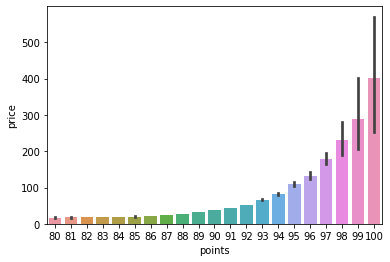

In [ ]:
# correlation between points and price
seaborn.barplot(x = 'points', y = 'price', data = word_cloud_df)

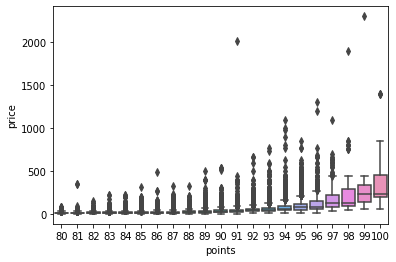

In [ ]:
seaborn.boxplot(x = 'points', y = 'price', data = word_cloud_df)

It appears from the visualizations above overall price increases as points increase in this dataset between $0 to $600. However when price goes above $600 there's some anomalies where for example there's a 91 point wine thats $2000. Yet there's wine in the 92-98 point range cheaper than $2000.

Create a word cloud to visualize the description column's text. These descriptions will assist with prediction models later on.

In [ ]:
# import dependencies
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt


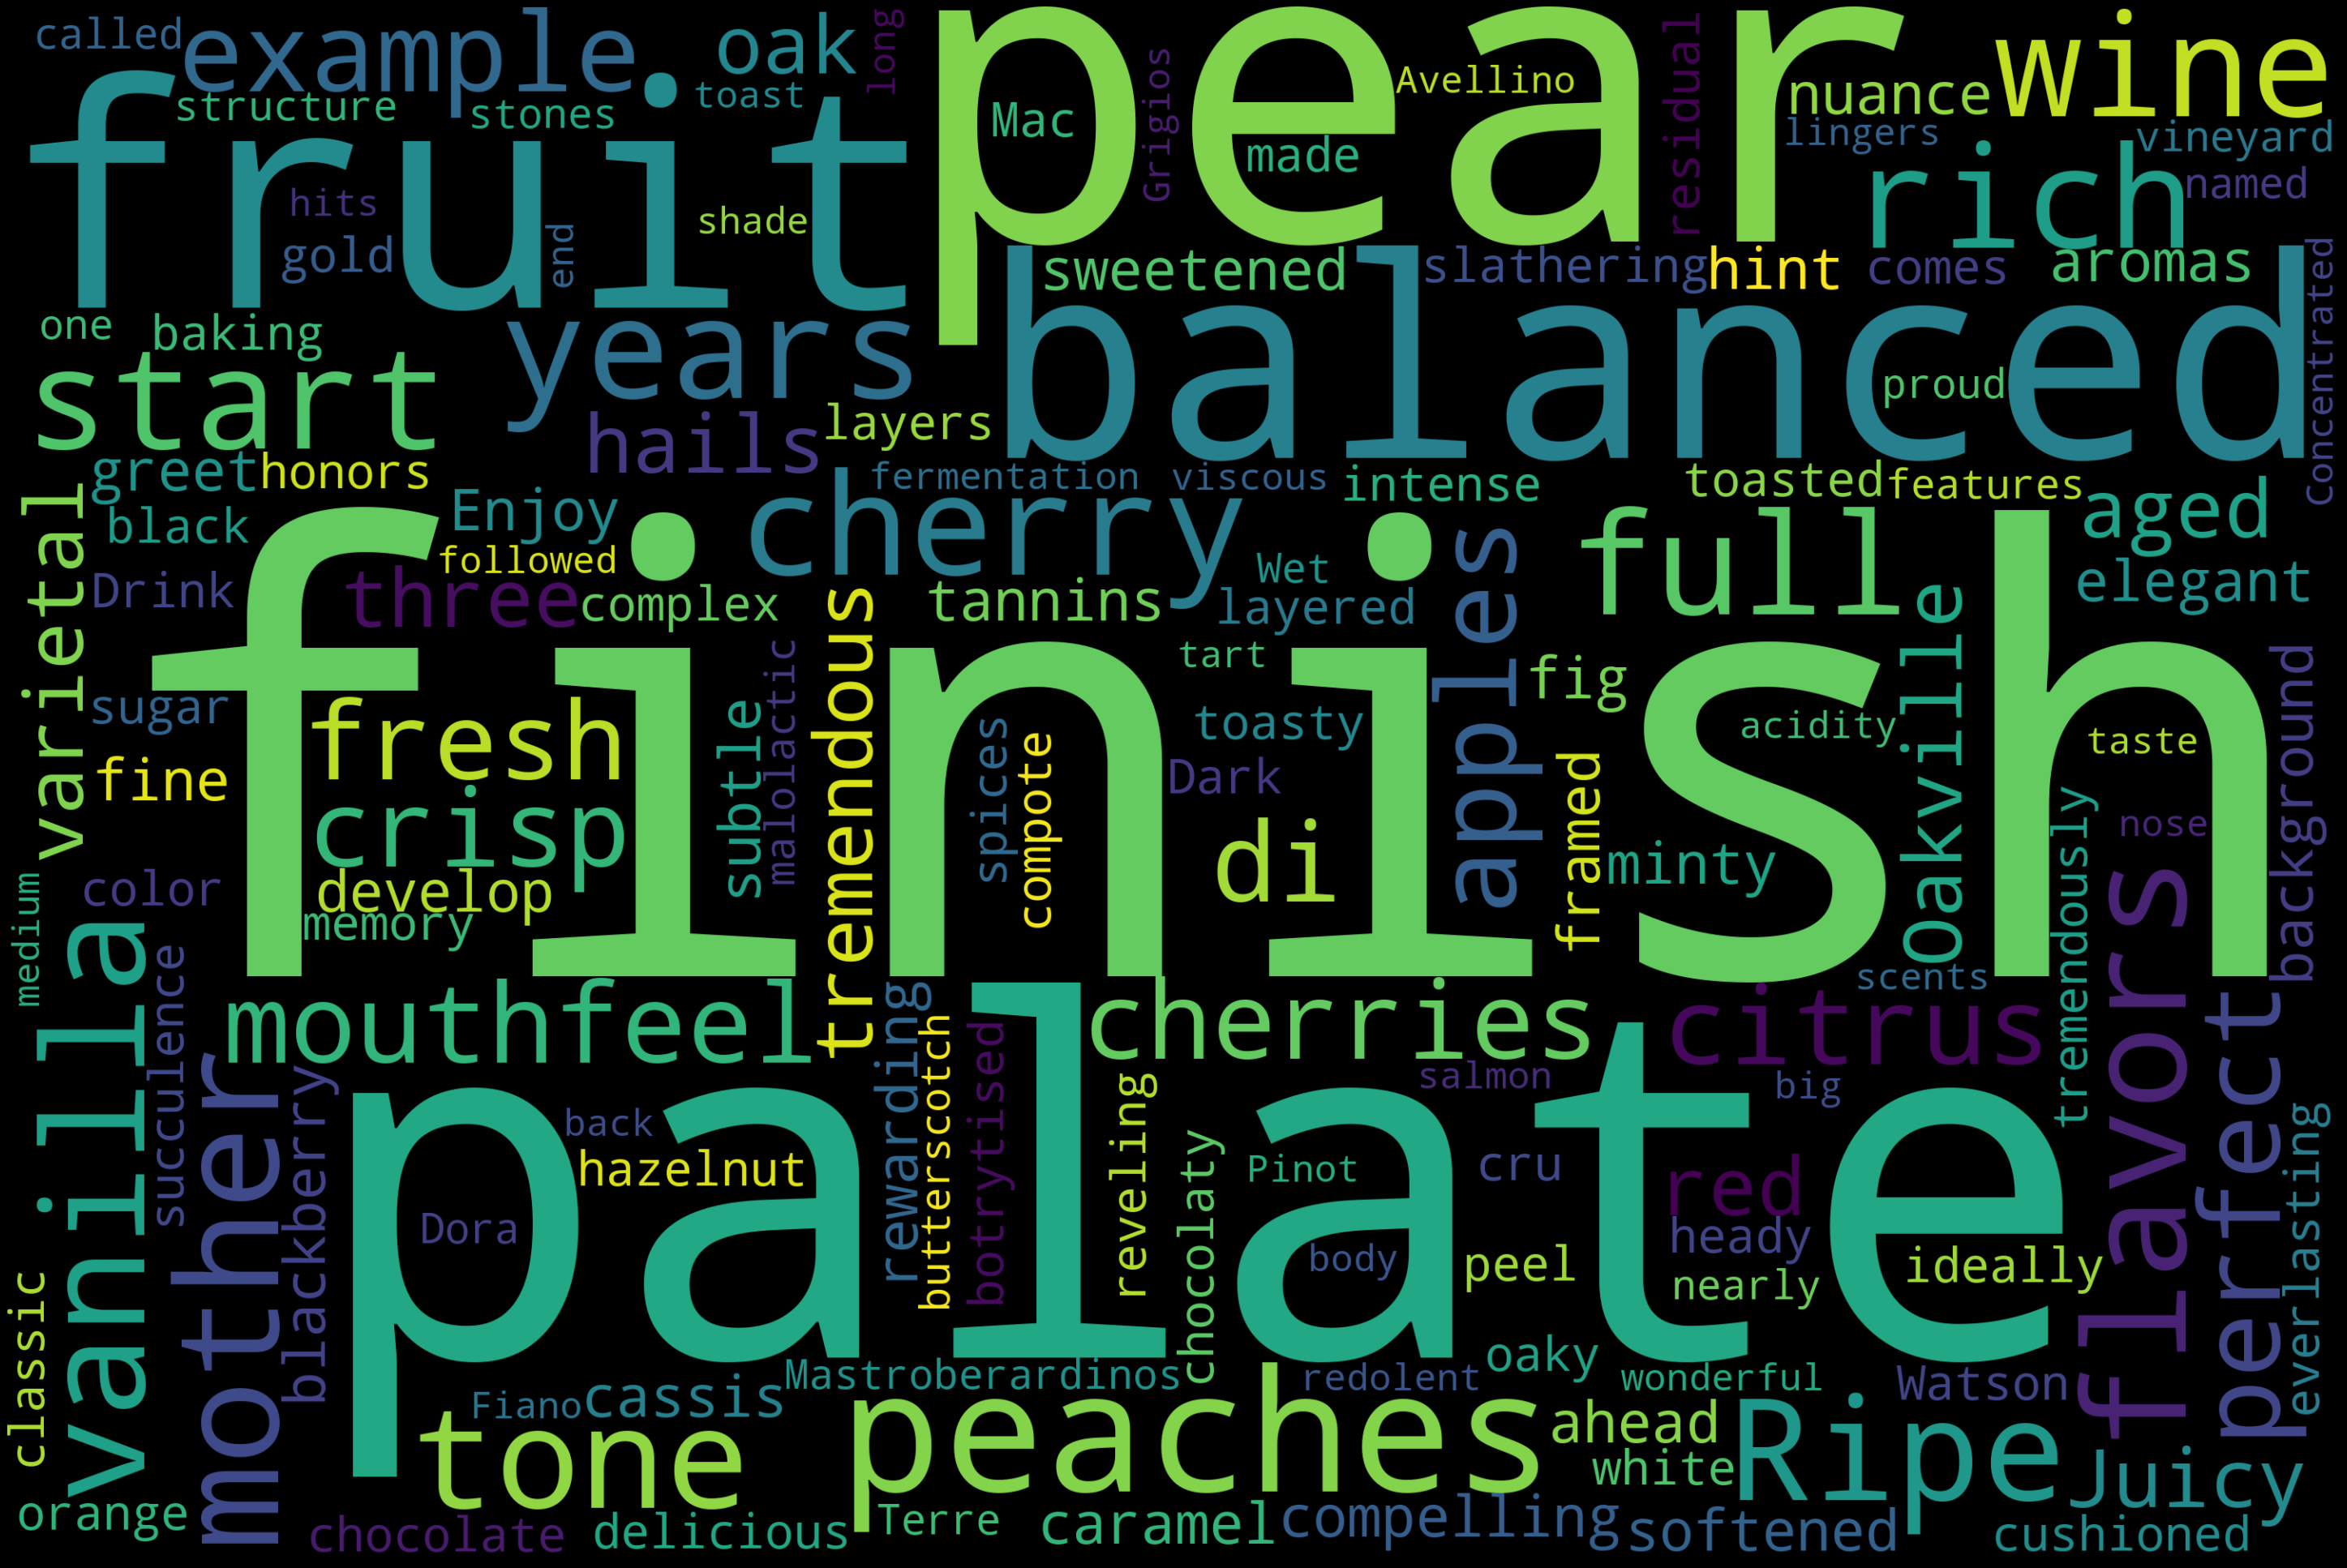

In [ ]:
# couldn't get my word cloud image to show, stack overflow was helpful
text = word_cloud_df.description.values
word_cloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k',)
plt.imshow(word_cloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()


Add a quality column from points of wines to create bins/classes that match the winemag wine point classifcations.

In [ ]:
# Robert Parker, one of the most important wine critics of our century, developed the 100-point rating scale that has governed wine since the late 1970s. 
# Parker created the system to mirror the grading systems used in schools where an “A+” is 95 or above, an “A” is 90 or above, a “B+” is 85 and above, and so on. 
# The wine in this data set only includes 80 points or higher, since most creditable wine magazines only pubish wine scoring in these ranges. 


Scores:

•	95-100 — Superb: one of the greats

•	90-94 — Excellent: extremely well-made and highly recommended

•	85-89 — Very good: may offer outstanding value if the price is right

•	80-84 — Good: solid wine, suitable for everyday consumption


In [ ]:
def getQuality(points):
  if(points <= 80):
    return 'Good'
  elif(points <= 85):
    return 'Very good'
  elif(points <= 90):
    return 'Excellent'
  elif(points <= 95):
    return 'Superb'
  else:
    return 'Mediocre(=< 79)'
    # return 'Unfortunately something went wrong, please try again'

In [ ]:
# apply this loop to the points column and add the 'quality' column
word_cloud_df['quality'] = word_cloud_df['points'].apply(getQuality)
word_cloud_df

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery,quality
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,Mediocre(=< 79)
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,Mediocre(=< 79)
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,Mediocre(=< 79)
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,Mediocre(=< 79)
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude,Superb
...,...,...,...,...,...,...,...,...,...,...,...,...
150925,150925,Italy,Many people feel Fiano represents southern Ita...,NaN,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Feudi di San Gregorio,Superb
150926,150926,France,"Offers an intriguing nose with ginger, lime an...",Cuvée Prestige,91,27.0,Champagne,Champagne,NaN,Champagne Blend,H.Germain,Superb
150927,150927,Italy,This classic example comes from a cru vineyard...,Terre di Dora,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Terredora,Superb
150928,150928,France,"A perfect salmon shade, with scents of peaches...",Grand Brut Rosé,90,52.0,Champagne,Champagne,NaN,Champagne Blend,Gosset,Excellent


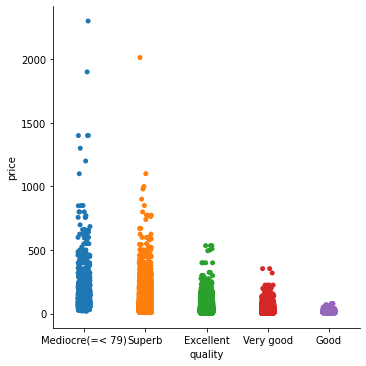

In [ ]:
seaborn.catplot(x = 'quality', y = 'price', data = word_cloud_df)

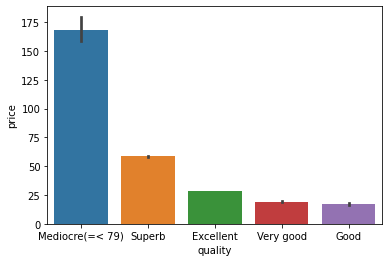

In [ ]:
seaborn.barplot(x = 'quality', y = 'price', data = word_cloud_df)


In [ ]:
def getPriceRange(price):
  if (price <= 25):
    return '$1-$25'
  if (price <= 50):
    return '$26-$50'
  if (price <= 75):
    return '$51-$75'
  if (price <= 100):
    return '$76-$100'
  if (price <= 200):
    return '$101-$200'
  if (price <= 300):
    return '$201-$300'
  if (price <= 400):
    return '$301-$400'
  if (price <= 500):
    return '$401-$500'
  if (price <= 1000):
    return '$501-$1000'
  if (price <= 1500):
    return '$1001-$1500'
  elif (math.isnan(price)):
    return '$0'
  else:
    return 'Above $1500'
  
    

In [ ]:
word_cloud_df['priceRange'] = word_cloud_df['price'].apply(getPriceRange)

In [ ]:
word_cloud_df.groupby(word_cloud_df['priceRange']).size()


priceRange
$0             13695
$1-$25         75175
$1001-$1500        7
$101-$200       2690
$201-$300        467
$26-$50        42643
$301-$400        154
$401-$500         81
$501-$1000        63
$51-$75        11786
$76-$100        4166
Above $1500        3
dtype: int64

In [ ]:
# reduce to view only description and points
word_cloud_compare_df = word_cloud_df[['description', 'points']]
word_cloud_compare_df.head()

,description,points
0,This tremendous 100% varietal wine hails from ...,96
1,"Ripe aromas of fig, blackberry and cassis are ...",96
2,Mac Watson honors the memory of a wine once ma...,96
3,"This spent 20 months in 30% new French oak, an...",96
4,"This is the top wine from La Bégude, named aft...",95


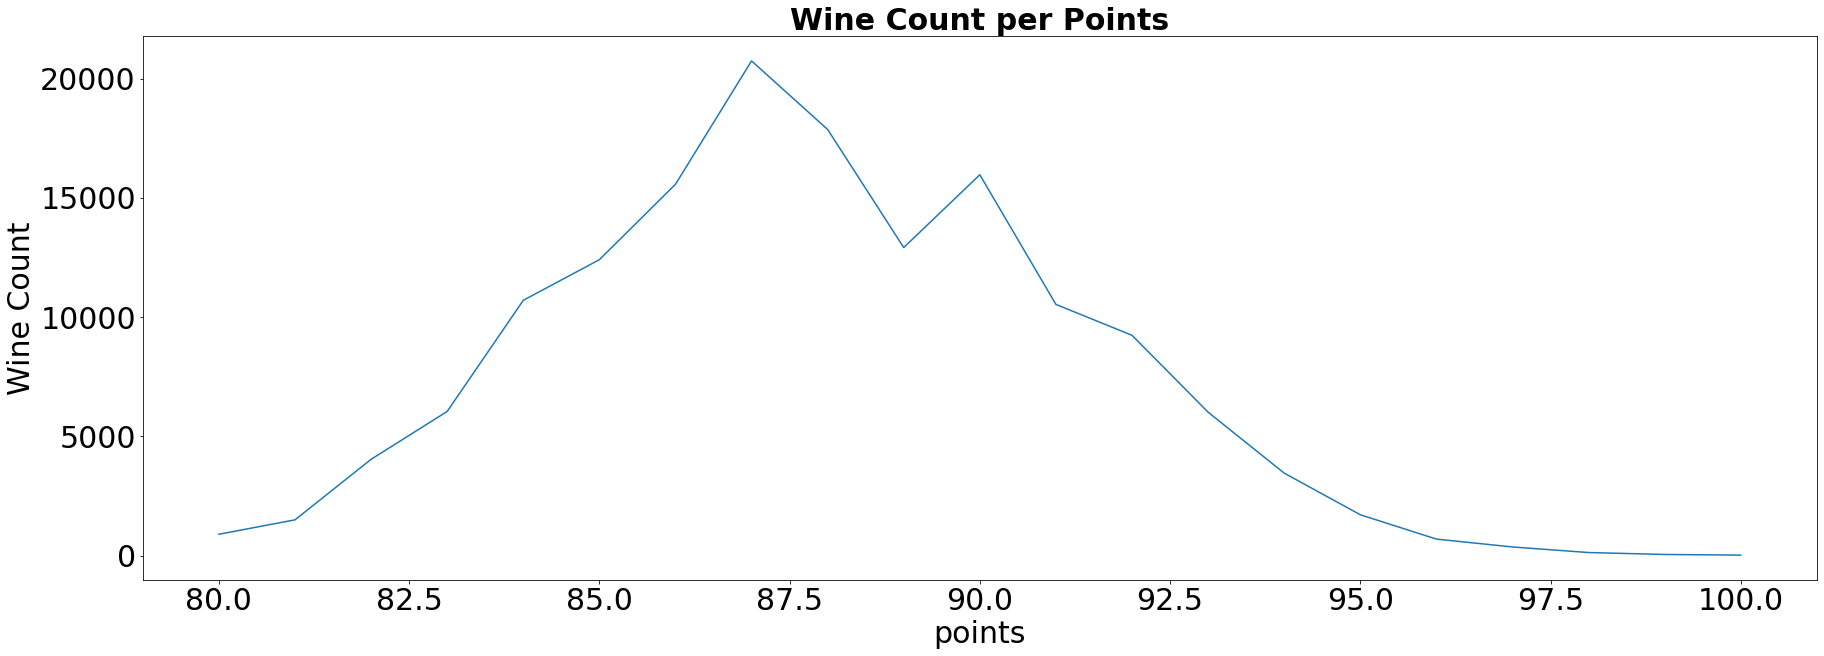

In [ ]:
# visualize points vs wine count to visualize where things may be oversampled

fig, ax = plt.subplots(figsize=(30,10))
plt.xticks(fontsize=30) 
plt.xticks(rotation=45)
plt.yticks(fontsize=30) 
ax.set_title('Wine Count per Points', fontweight="bold", size=30)
ax.set_ylabel('Wine Count', fontsize = 30)
ax.set_xlabel('Points', fontsize = 30)

word_cloud_compare_df.groupby(['points']).count()['description'].plot(ax=ax)#kind=bar for a bar chart

plt.show()


Remember to explore tools to deal with the majority of the data being in the mid 80's range (and overwhelming red vs white)

In [ ]:
# Descripton length vs points

In [ ]:
# create lenght column
word_cloud_compare_df = word_cloud_compare_df.assign(description_length = word_cloud_compare_df['description'].apply(len))
word_cloud_compare_df.head()


,description,points,description_length
0,This tremendous 100% varietal wine hails from ...,96,355
1,"Ripe aromas of fig, blackberry and cassis are ...",96,318
2,Mac Watson honors the memory of a wine once ma...,96,280
3,"This spent 20 months in 30% new French oak, an...",96,386
4,"This is the top wine from La Bégude, named aft...",95,376


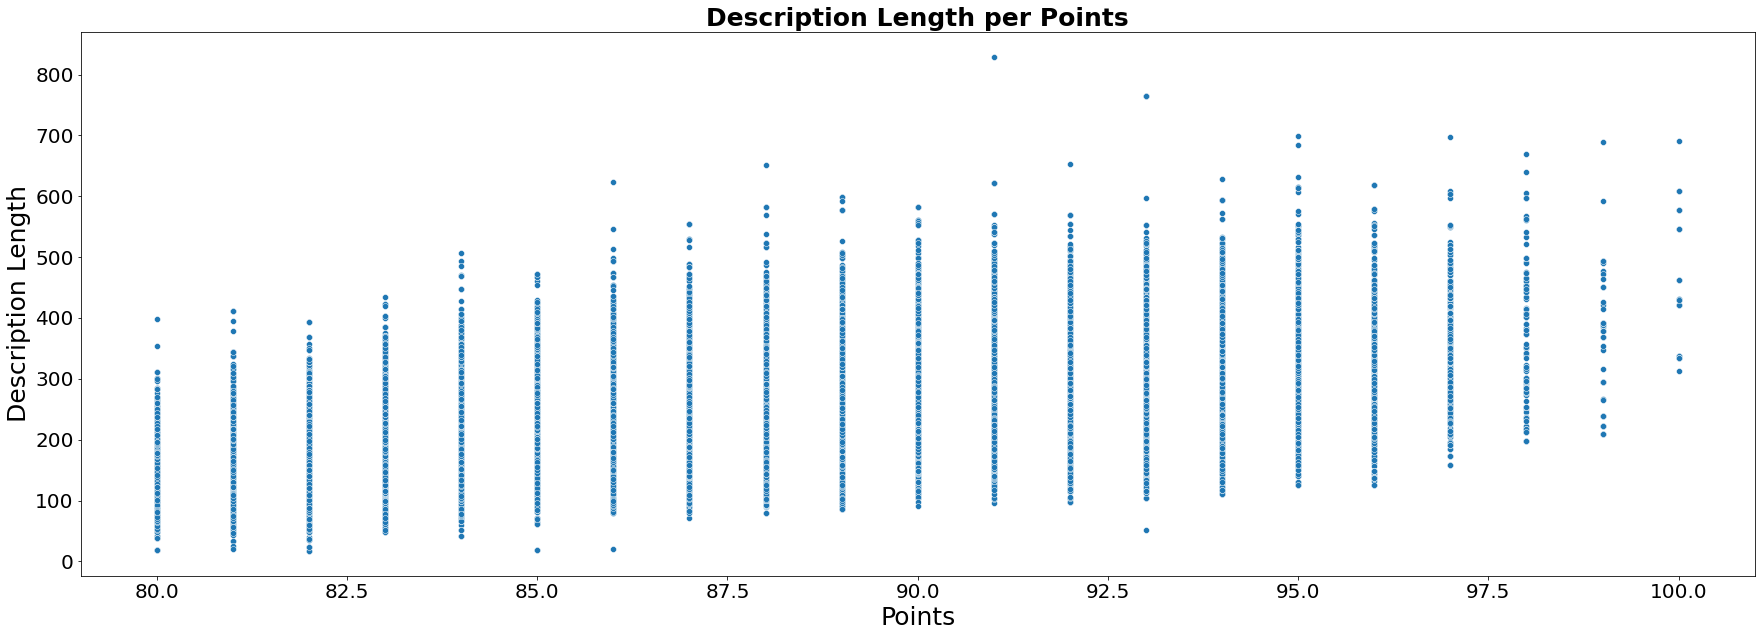

In [ ]:
# correlation between description length and points
fig, ax = plt.subplots(figsize=(30,10))
seaborn.scatterplot(x='points', y='description_length', data=word_cloud_compare_df)
plt.xticks(fontsize=20) 
plt.yticks(fontsize=20) 
ax.set_title('Description Length per Points', fontweight="bold", size=25) 
ax.set_ylabel('Description Length', fontsize = 25) 
ax.set_xlabel('Points', fontsize = 25) 
plt.show()

It's obvious that the longer the description the higher the wine count

In [ ]:
# Transform points so they can easily be used in data models
# def getQuality(points):
#   if points < 80:
#     return '1'
#   elif points >= 80 and points < 84:
#     return '2'
#   elif points >= 85 and points < 89:
#     return '3'
#   elif points >= 90 and points < 94:
#     return '4'
#   elif points >= 95 and points < 100:
#     return '5'
#   else:
#     return '0'

In [ ]:
def getQuality(points):
  if points < 84:
    return '1'
  elif points >= 84 and points < 88:
    return '2'
  elif points >= 88 and points < 92:
    return '3'
  elif points >= 92 and points < 96:
    return '4'
  else:
    return '5'

# Add points_simplified column
word_cloud_compare_df = word_cloud_compare_df.assign(points_simplified = word_cloud_compare_df['points'].apply(getQuality))
word_cloud_compare_df.head()

,description,points,description_length,points_simplified
0,This tremendous 100% varietal wine hails from ...,96,355,5
1,"Ripe aromas of fig, blackberry and cassis are ...",96,318,5
2,Mac Watson honors the memory of a wine once ma...,96,280,5
3,"This spent 20 months in 30% new French oak, an...",96,386,5
4,"This is the top wine from La Bégude, named aft...",95,376,4


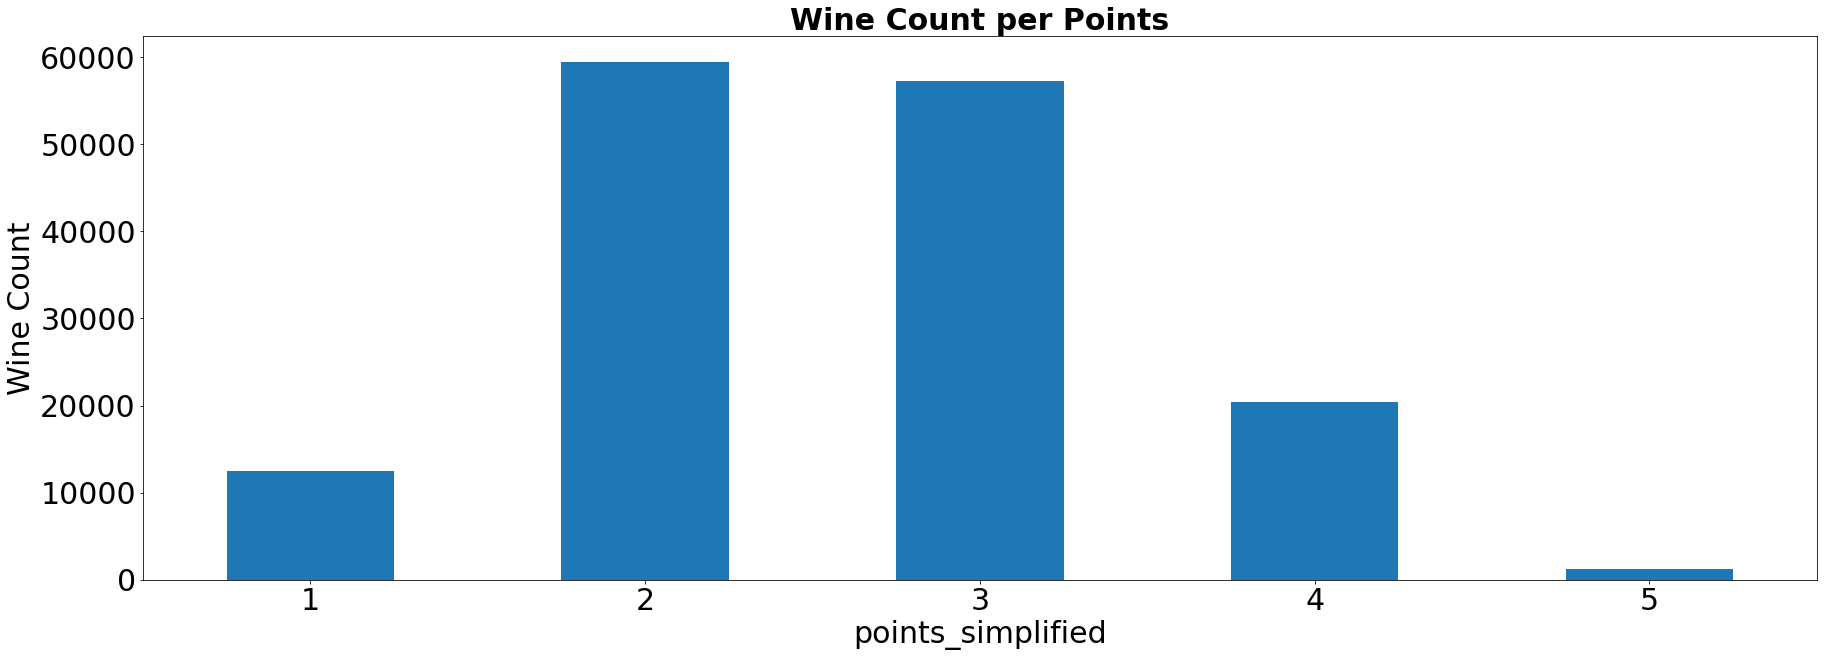

In [ ]:
# visualize the wine count per new simplified points
fig, ax = plt.subplots(figsize=(30,10))
plt.xticks(fontsize=30) 
plt.yticks(fontsize=30) 
ax.set_title('Wine Count per Points', fontweight="bold", size=30)
ax.set_ylabel('Wine Count', fontsize = 30)
ax.set_xlabel('Points', fontsize = 30) 
word_cloud_compare_df.groupby(['points_simplified']).count()['description'].plot(ax=ax, kind = 'bar')#kind=bar for a bar chart
plt.xticks(rotation=0)
plt.show()

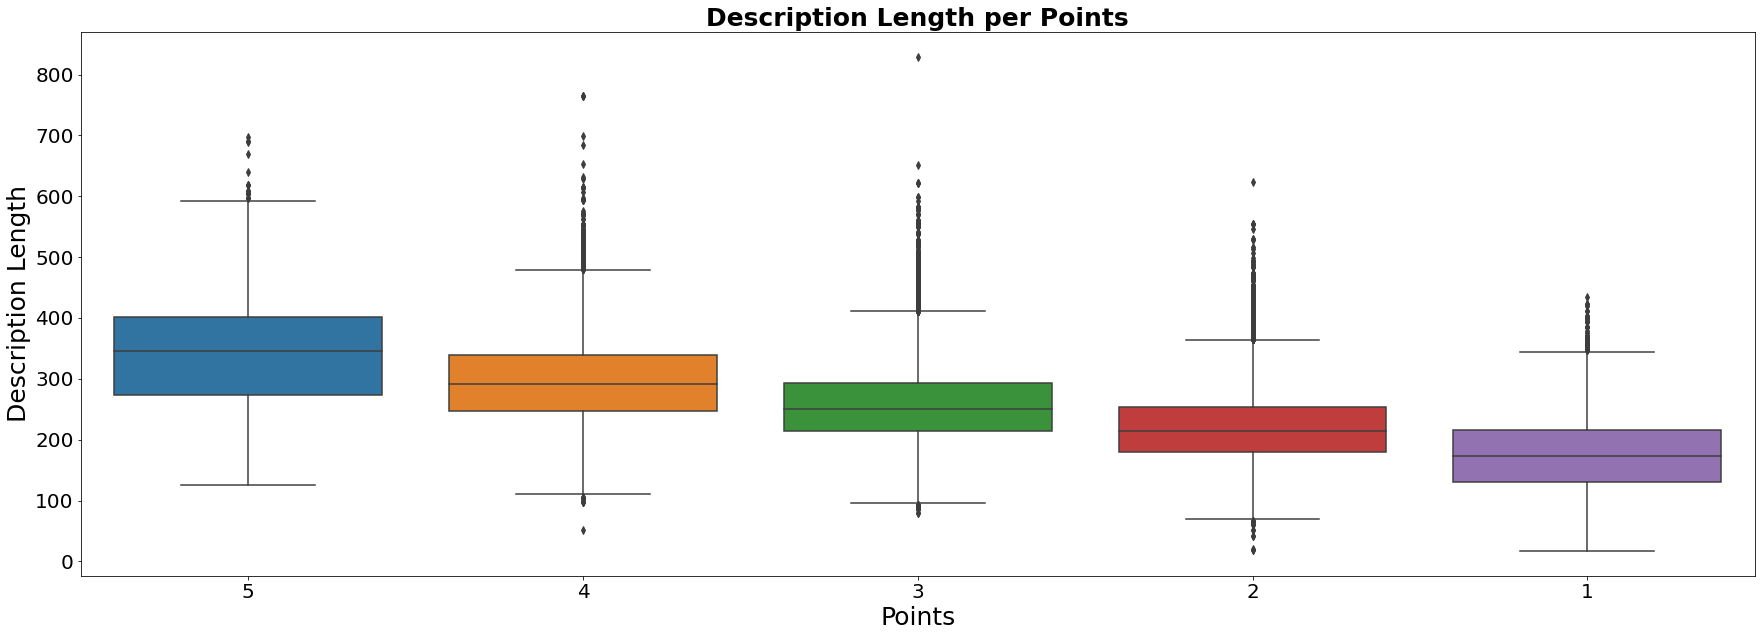

In [ ]:
fig, ax = plt.subplots(figsize=(30,10))
seaborn.boxplot(x='points_simplified', y='description_length', data=word_cloud_compare_df)
plt.xticks(fontsize=20) # X Ticks
plt.yticks(fontsize=20) # Y Ticks
ax.set_title('Description Length per Points', fontweight="bold", size=25) # Title
ax.set_ylabel('Description Length', fontsize = 25) # Y label
ax.set_xlabel('Points', fontsize = 25) # X label
plt.show()


In [ ]:
# vectorize
X = word_cloud_compare_df['description']
y = word_cloud_compare_df['points_simplified']



In [ ]:
vectorizer = CountVectorizer()

In [ ]:
vectorizer.fit

<bound method CountVectorizer.fit of CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)>

In [ ]:
print(vectorizer.vocabulary)

None


In [ ]:
# # vectorize x based on trained data per kaggle recommendation
# X = vectorizer.transform(X)

# print('Shape of Sparse Matrix: ', X.shape)
# print('Number of Non-Zero occurences: ', X.nnz)
# density = (100.0 * X.nnz / (X.shape[0] * X.shape[1]))
# print('Density: {}'.format((density)))

NotFittedError: ignored

In [ ]:
# from sklearn.svm import LinearSVC
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.externals import joblib
# import Stemmer
# import pickle

# english_stemmer = Stemmer.Stemmer('en')

# class StemmedTfidfVectorizer(TfidfVectorizer):
#     def build_analyzer(self):
#         analyzer = super(TfidfVectorizer, self).build_analyzer()
#         return lambda doc: english_stemmer.stemWords(analyzer(doc))


# clf = joblib.load('linearL0_3gram_100K.pkl')
# test = ["My super elaborate test string to test predictions"]
# print test + clf.predict(test)[0]

SyntaxError: ignored

In [ ]:
!pip install Stemmer

ERROR: Could not find a version that satisfies the requirement Stemmer (from versions: none)
ERROR: No matching distribution found for Stemmer


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.externals import joblib
from sklearn.pipeline import Pipeline
import Stemmer
import pickle

english_stemmer = Stemmer.Stemmer('en')


class StemmedTfidfVectorizer(TfidfVectorizer):
    def build_analyzer(self):
        analyzer = super(TfidfVectorizer, self).build_analyzer()
        return lambda doc: english_stemmer.stemWords(analyzer(doc))


def create_tfidf(f):
    docs = []
    targets = []
    with open(f, "r") as sentences_file:
        reader = csv.reader(sentences_file, delimiter=';')
        reader.next()
        for row in reader:
            docs.append(row[1])
            targets.append(row[0])
    return docs, targets


docs,y = create_tfidf("l1.csv")
tf = StemmedTfidfVectorizer(analyzer='word', ngram_range=(1,2), min_df = 0, max_features=200000, stop_words = 'english')
clf = LinearSVC()

vec_clf = Pipeline([('tfvec', tf), ('svm', clf)])

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


ModuleNotFoundError: ignored